# Importing Data From Tables
Kozo Nishida and Barry Demchak

2021-01-31

Cytoscape supports the ability to link data to networks as node and edge attributes, enabling data-driven network visualization. This tutorial describes how to load expression data from a spreadsheet, and how to link it to already loaded networks.

## Installation

First, launch [Cytoscape Desktop](https://cytoscape.org/) and install the [FileTransfer App](http://apps.cytoscape.org/apps/filetransfer).

Then run the following chunk of code below to install the py4cytoscape module.

In [ ]:
%%capture
!python3 -m pip install python-igraph requests pandas networkx
!python3 -m pip install py4cytoscape

In [ ]:
import IPython
import py4cytoscape as p4c
print(f'Loading Javascript client ... {p4c.get_browser_client_channel()} on {p4c.get_jupyter_bridge_url()}')
browser_client_js = p4c.get_browser_client_js()
IPython.display.Javascript(browser_client_js) # Start browser client

In [ ]:
p4c.cytoscape_version_info()

In [ ]:
p4c.sandbox_get_file_info('.')

## Loading Network

*   Import **galFiltered network**.

In [ ]:
!wget https://raw.githubusercontent.com/cytoscape/RCy3/master/inst/extdata/galFiltered.sif

In [ ]:
!head galFiltered.sif

In [ ]:
p4c.sandbox_send_to("galFiltered.sif")

In [ ]:
p4c.import_network_from_file("galFiltered.sif")


*   When the network first opens, the entire network may not visible because of the default zoom factor used. To see the whole network,


In [ ]:
p4c.fit_content()


*   By default, the "Prefuse Force Directed Layout" is applied to organize the layout of the nodes. The default layout can be changed


In [ ]:
p4c.get_layout_names()

In [ ]:
p4c.layout_network('cose')

In [ ]:
p4c.layout_network('force-directed')

In [ ]:
p4c.export_image(filename="galFiltered.png")
p4c.sandbox_get_from("galFiltered.png")
from IPython.display import Image
Image('galFiltered.png')

## Loading Expression Data

The data you are working with is from yeast, the genes **Gal1, Gal4,** and **Gal80** are all yeast transcription factors. Your expression experiments all involve some perturbation of these transcription factor genes.

Gal1, Gal4, and Gal80 are also represented in your interaction network, where they are labeled according to yeast locus tags: **Gal1 corresponds to YBR020W, Gal4 to YPL248C, and Gal80 to YML051W.**

*   Run the following chunk to view the first few lines. This [galExpData.csv](https://cytoscape.github.io/cytoscape-tutorials/protocols/data/galExpData.csv) is also included with your Cytoscape installation directory, under **sampleData**.


In [ ]:
import pandas as pd
df=pd.read_csv("https://cytoscape.github.io/cytoscape-tutorials/protocols/data/galExpData.csv")
df.head()

Note the following information about the file:

*   The first line consists of column labels.
*   All columns are separated by a single comma character.
*   The first column contains node names, and **must match the names of the nodes in your network exactly!**
*   The second column contains common locus names. This column is optional, the data is not used by Cytoscape, but including this column makes the format consistent with the output of many analysis packages, and makes the file easier to read.
*   The remaining columns contain experimental data, two columns per experiment (one for expression measurement and a second for corresponding significance value), and one line per node. In this case, there are three expression results per node.

---



*   Run the following code chunk to load the **galExpData.csv** file
*   You need to set the **Key** column to indicate which column will be used to match with the network key column.


In [ ]:
p4c.load_table_data(df, data_key_column="GENE")

Now you should see expression values listed in new columns in the **Node Table**. The **Table Panel** has the following features:

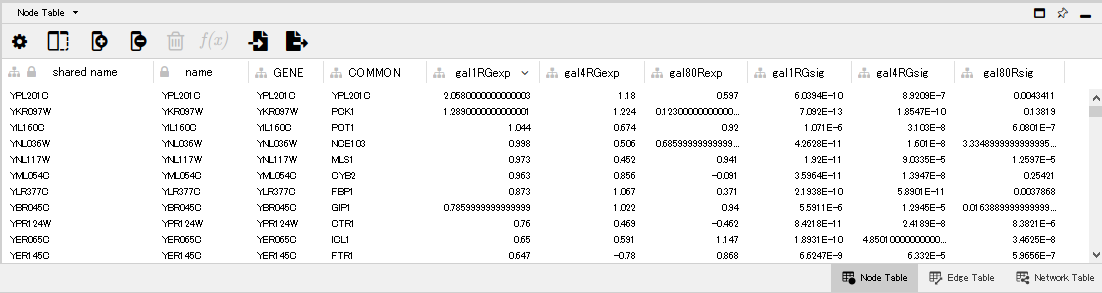


*   Select a node in the network and the table will update to show only the corresponding row.
*   You can limit the columns shown by clicking on the **Show Columns** button 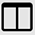  and selecting columns.
